In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns 

In [2]:
# ucimlrepo 패키지 설치 
!pip install ucimlrepo

# 필요한 함수 가져오기
from ucimlrepo import fetch_ucirepo

# 데이터셋 가져오기
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# 데이터 (pandas 데이터프레임 형태로)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

In [3]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


In [4]:
y.value_counts()

Revenue
False      10422
True        1908
Name: count, dtype: int64

# 1. Overview of data 

In [5]:
def describe(df, sort_by='Name', ascending=True):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary.reset_index(inplace=True)
    summary.rename(columns={'index': 'Name'}, inplace=True)
    
    summary['Missing'] = df.isnull().sum().values     
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    
    # Find last valid value for each column
    last_valid_values = []
    for i in range(len(df.columns)):
        last_valid_index = -1
        while pd.isnull(df.iloc[last_valid_index, i]):
            last_valid_index -= 1
        last_valid_values.append(df.iloc[last_valid_index, i])
    
    # Assign last valid values to Last Value column
    summary['Last Valid Value'] = last_valid_values
    
    return summary

In [6]:
describe(X)

Dataset Shape: (12330, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Last Valid Value
0,Administrative,int64,0,27,0,0,0
1,Administrative_Duration,float64,0,3335,0.0,0.0,0.0
2,Informational,int64,0,17,0,0,0
3,Informational_Duration,float64,0,1258,0.0,0.0,0.0
4,ProductRelated,int64,0,311,1,2,3
5,ProductRelated_Duration,float64,0,9551,0.0,64.0,21.25
6,BounceRates,float64,0,1872,0.2,0.0,0.0
7,ExitRates,float64,0,4777,0.2,0.1,0.066667
8,PageValues,float64,0,2704,0.0,0.0,0.0
9,SpecialDay,float64,0,6,0.0,0.0,0.0


In [7]:
# X, y 데이터 프레임 병합
combined_df = pd.concat([X, y], axis=1)
combined_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [8]:
import warnings

# SettingWithCopyWarning 경고 메시지를 무시합니다.
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

#Converting the data types as require
X['OperatingSystems'] = X['OperatingSystems'].astype('object')
X['Browser'] = X['Browser'].astype('object')
X['Region'] = X['Region'].astype('object')
X['TrafficType'] = X['TrafficType'].astype('object')
combined_df['Revenue']= combined_df['Revenue'].astype('object')

# 2. EDA

# 2.1 상관관계 분석

## 2.1.1 연속형 변수 간의 상관관계 계산(Pearson 상관계수)

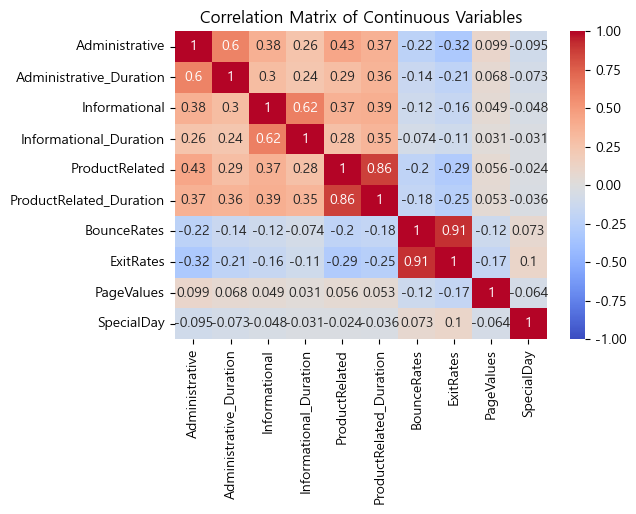

In [9]:
# 연속형 변수 선택
continuous_vars = X[['Administrative', 'Administrative_Duration', 'Informational', 
                     'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                     'BounceRates', 'ExitRates', 'PageValues','SpecialDay']]

# 상관관계 행렬 계산
corr_matrix = continuous_vars.corr()

# Heatmap 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

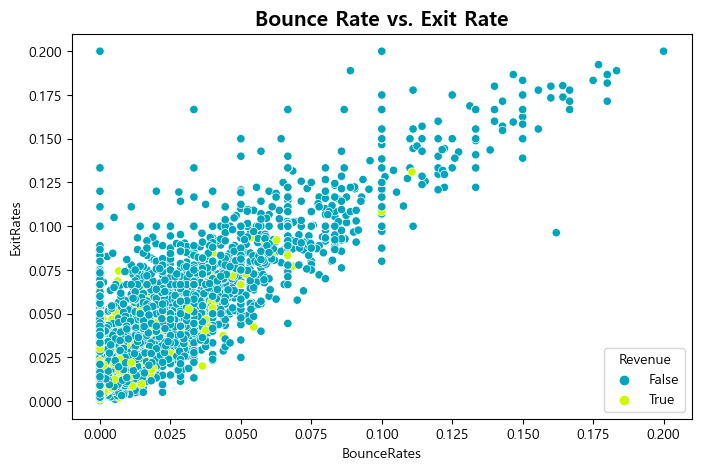

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=combined_df,hue='Revenue',palette='nipy_spectral')
plt.title('Bounce Rate vs. Exit Rate',fontweight='bold',fontsize=15)
plt.show()

# Higher bounce rates are generally associated with higher exit rates

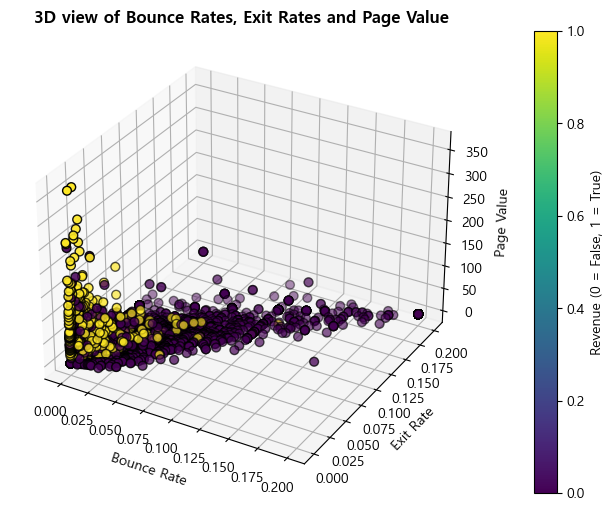

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 3D 산점도 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(combined_df['BounceRates'], combined_df['ExitRates'], combined_df['PageValues'],
                c=combined_df['Revenue'], cmap=plt.cm.viridis, edgecolor='k', s=40)

# 제목과 축 레이블 설정
ax.set_title("3D view of Bounce Rates, Exit Rates and Page Value", fontweight='bold')
ax.set_xlabel("Bounce Rate")
ax.set_ylabel("Exit Rate")
ax.set_zlabel("Page Value")

# 컬러바 추가
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Revenue (0 = False, 1 = True)')

plt.show()
plt.show()


## 2.1.2 범주형 변수 간의 상관관계 분석(Cramer V 상관계수)

In [12]:
from math import sqrt
from scipy.stats import chi2_contingency 
### Applying Cramer's V
### 크래머 V 계수 적용하기
#Formula from https://en.wikipedia.org/wiki/Cram%C3%A9r's_V
#https://github.com/BuissonFlorent/BehavioralDataAnalysis/blob/master/Chapter%204%20-%20Building%20Causal%20Diagrams%20From%20Scratch/ch04.ipynb


def CramerV(var1, var2):
    pivot_tb = pd.crosstab(var1, var2, margins=False)
    chi_sq, _, _, _ = chi2_contingency(pivot_tb) 
    n = len(var1)
    k = len(var1.unique())
    r = len(var2.unique())
    V = sqrt((chi_sq / n) / (min(k - 1, r - 1)))
    return V

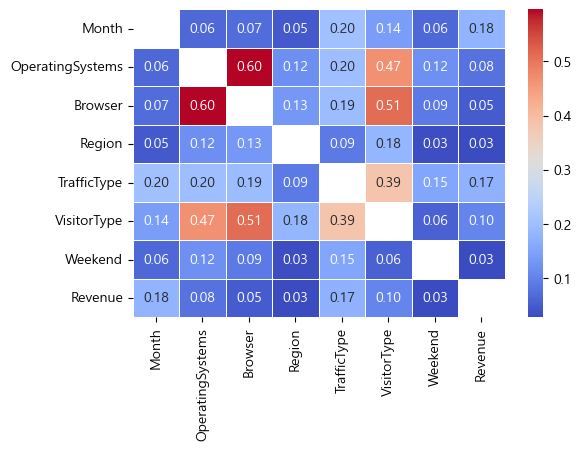

In [13]:
cramer_df = combined_df[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']]

# 크래머 V 계수를 계산할 컬럼들
columns = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']

# 크래머 V 계수를 저장할 행렬 생성
cramer_matrix = pd.DataFrame(index=columns, columns=columns)

# 크래머 V 계수 계산
for column1 in columns:
    for column2 in columns:
        if column1 != column2:
            V = CramerV(cramer_df[column1], cramer_df[column2])
            # 크래머 V 계수를 행렬에 저장할 때, NaN 대신 0으로 변환
            if np.isnan(V):
                V = 0
            cramer_matrix.loc[column1, column2] = V

# 시각화 - 히트맵
plt.figure(figsize=(6, 4))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


# 2.2 방문 패턴 분석 
## 2.2.1 월별, 주말, 특정 날짜 

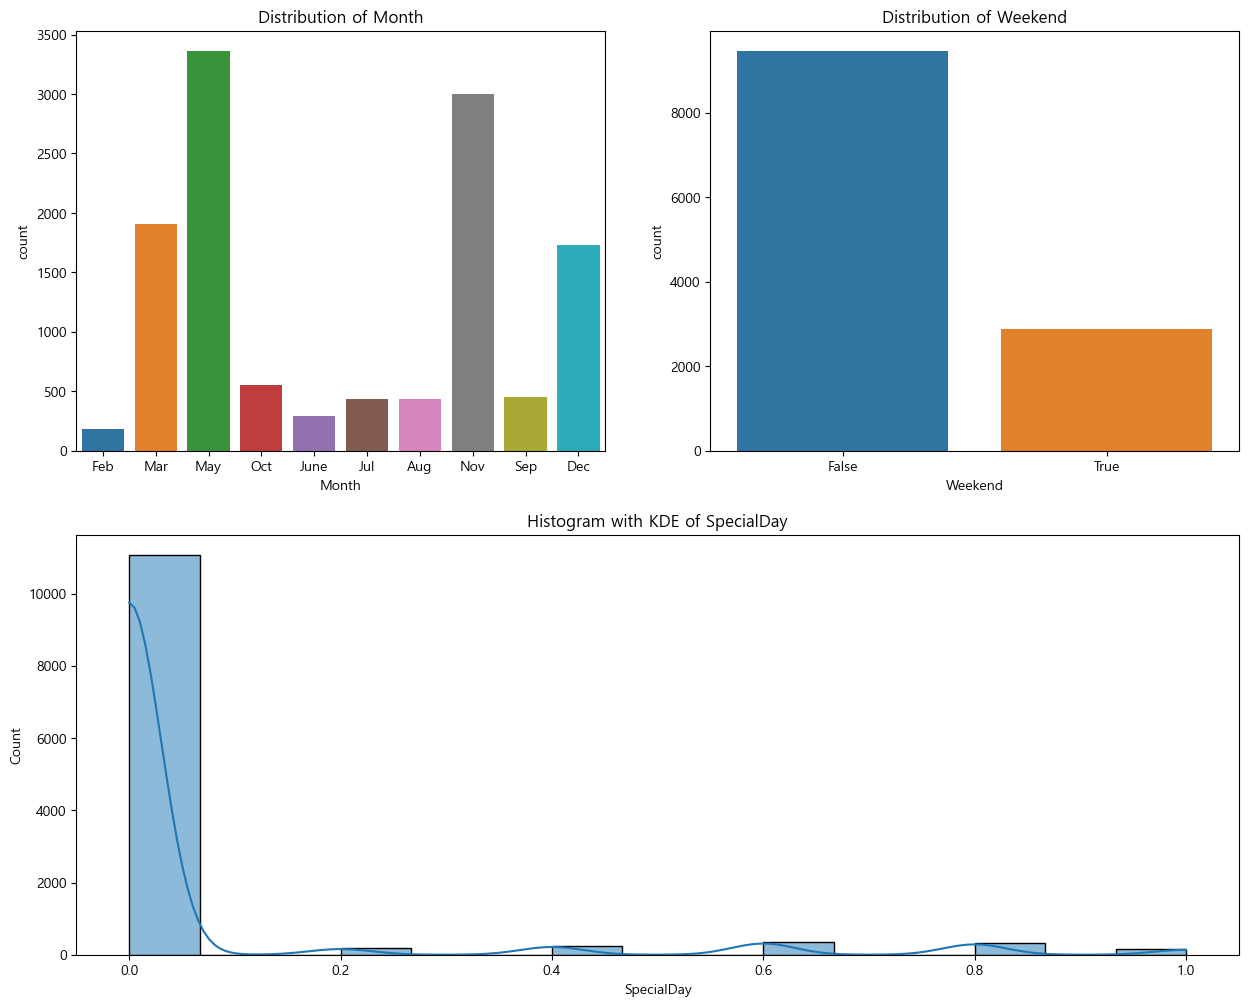

<Figure size 640x480 with 0 Axes>

In [14]:
# Month 변수의 분포
plt.figure(figsize=(15,12))

plt.subplot(2, 2, 1)
sns.countplot(x='Month', data=X)
plt.title('Distribution of Month')

# Weekend 변수의 분포
plt.subplot(2, 2, 2)
sns.countplot(x='Weekend', data=X)
plt.title('Distribution of Weekend')

#SpecialDay 변수의 분포
plt.subplot(2,1,2)
sns.histplot(x='SpecialDay', data=X, kde=True)
plt.title('Histogram with KDE of SpecialDay')
plt.xlabel('SpecialDay')
plt.ylabel('Count')
plt.show()

plt.tight_layout()
plt.show()

## 2.2.2 방문 패턴 - 지역, 신규 가입자 여부 

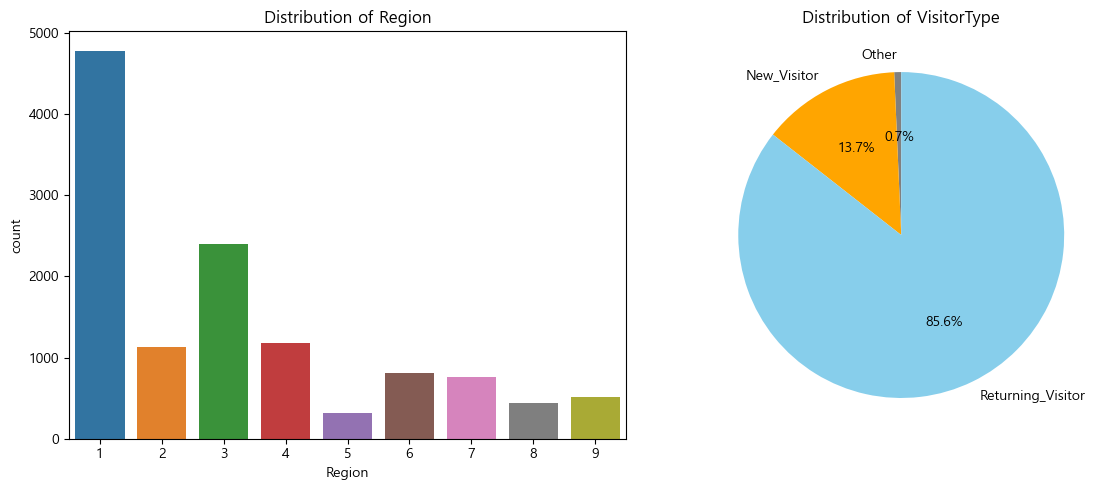

In [15]:
# Region 변수의 분포
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Region', data=X)
plt.title('Distribution of Region')

# VisitorType  변수의 분포
visitor_counts = X['VisitorType'].value_counts().sort_values(ascending=True)
colors = ['gray', 'orange', 'skyblue']
plt.subplot(1, 2, 2)
plt.pie(visitor_counts, labels=visitor_counts.index, autopct='%1.1f%%', startangle =90, colors=colors)
plt.title('Distribution of VisitorType')

plt.tight_layout()
plt.show()

## 2.2.3 방문 패턴 - OperatingSystems, Browser, TrafficType

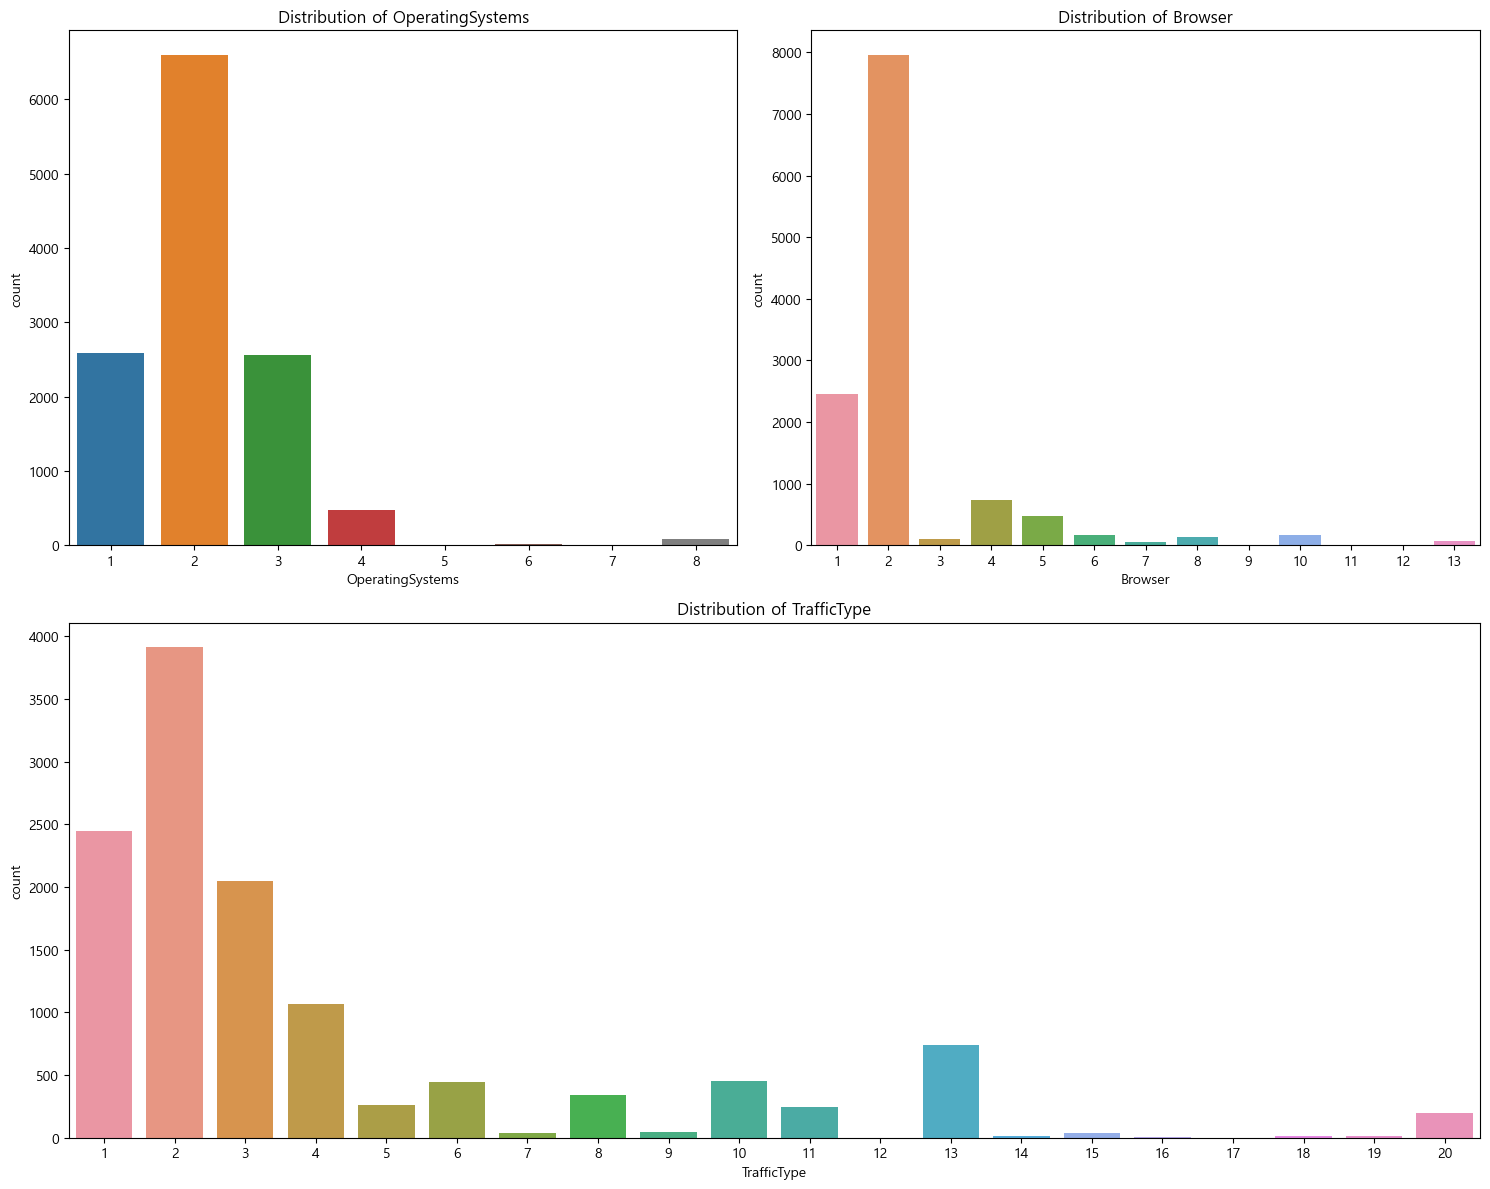

In [16]:
plt.figure(figsize=(15,12))
# OperatingSystems 변수의 분포
plt.subplot(2, 2, 1)
sns.countplot(x='OperatingSystems', data=X)
plt.title('Distribution of OperatingSystems')

# Browser 변수의 분포
plt.subplot(2, 2, 2)
sns.countplot(x='Browser', data=X)
plt.title('Distribution of Browser')

#TrafficType 변수의 분포
plt.subplot(2,1,2)
sns.countplot(x='TrafficType', data=X)
plt.title('Distribution of TrafficType')

plt.tight_layout()
plt.show()

# 2.3 세션 패턴 분석

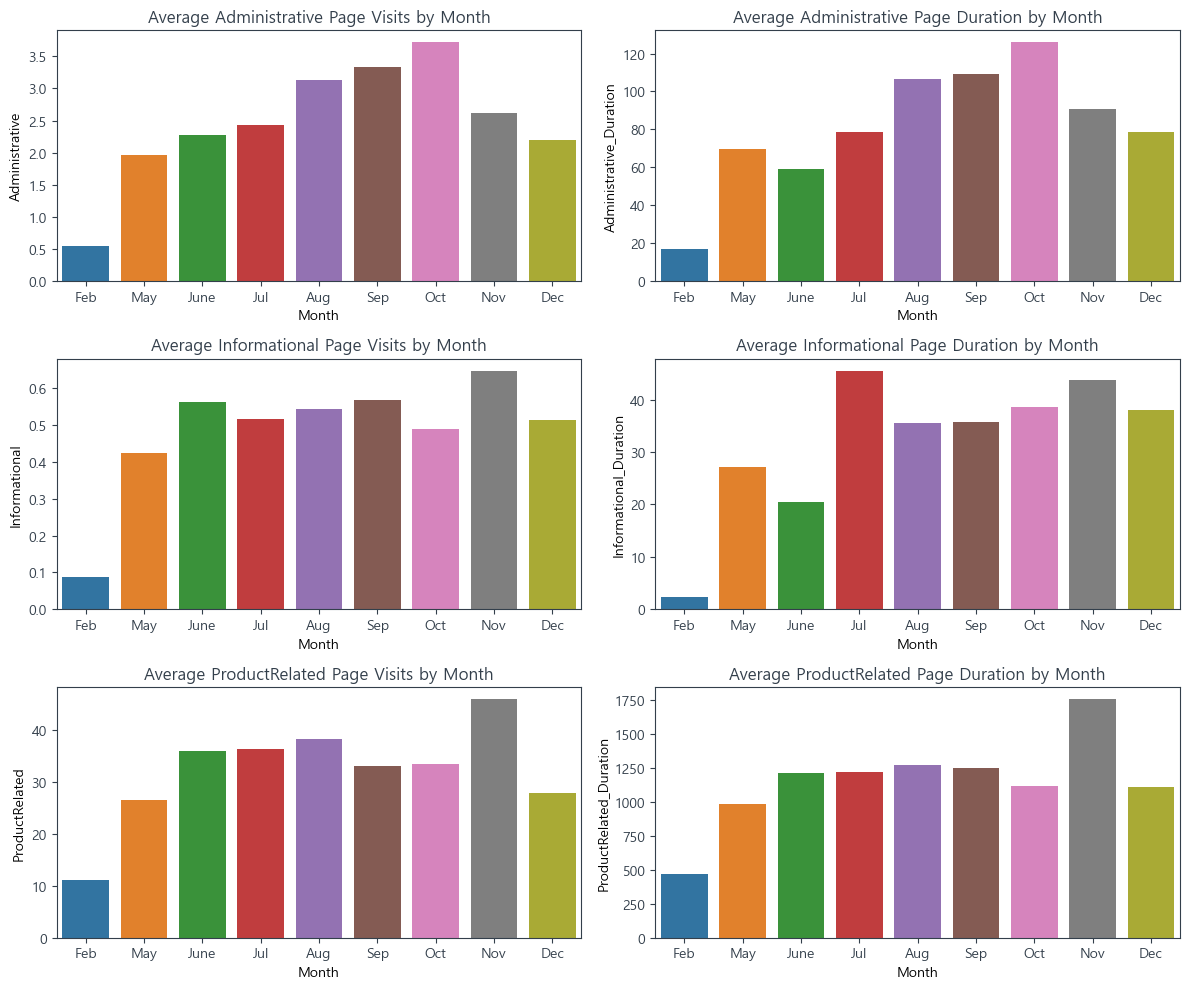

In [97]:
# Month 열을 기준으로 데이터를 정렬 (가정)
df =combined_df.sort_values(by='Month')

# 월별 방문자를 정의하기 위해 가입 월(Month)을 기준으로 그룹화
visitors = df.groupby('Month')

# 월별 순서 설정
month_order = ['Feb', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 월별 코호트 분석을 위해 월별로 데이터 그룹화
visitors = df.groupby('Month').agg({
    'Administrative': 'mean',
    'Administrative_Duration': 'mean',
    'Informational': 'mean',
    'Informational_Duration': 'mean',
    'ProductRelated': 'mean',
    'ProductRelated_Duration': 'mean'
}).reindex(month_order).reset_index()

# 코호트 분석 결과 시각화 (월별 페이지 방문 횟수와 방문 시간 비교)
plt.figure(figsize=(12, 10))


# Administrative 페이지 관련 데이터 시각화
plt.subplot(3, 2, 1)
sns.barplot(x='Month', y='Administrative', data=visitors)
plt.title('Average Administrative Page Visits by Month')

plt.subplot(3, 2, 2)
sns.barplot(x='Month', y='Administrative_Duration', data=visitors)
plt.title('Average Administrative Page Duration by Month')

# Informational 페이지 관련 데이터 시각화
plt.subplot(3, 2, 3)
sns.barplot(x='Month', y='Informational', data=visitors)
plt.title('Average Informational Page Visits by Month')

plt.subplot(3, 2, 4)
sns.barplot(x='Month', y='Informational_Duration', data=visitors)
plt.title('Average Informational Page Duration by Month')

# ProductRelated 페이지 관련 데이터 시각화
plt.subplot(3, 2, 5)
sns.barplot(x='Month', y='ProductRelated', data=visitors)
plt.title('Average ProductRelated Page Visits by Month')

plt.subplot(3, 2, 6)
sns.barplot(x='Month', y='ProductRelated_Duration', data=visitors)
plt.title('Average ProductRelated Page Duration by Month')

plt.tight_layout()
plt.show()


# 3. 구매 패턴 분석

- Revenue
- 월별 분석
- 방문자 유형별 분석

In [18]:
combined_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


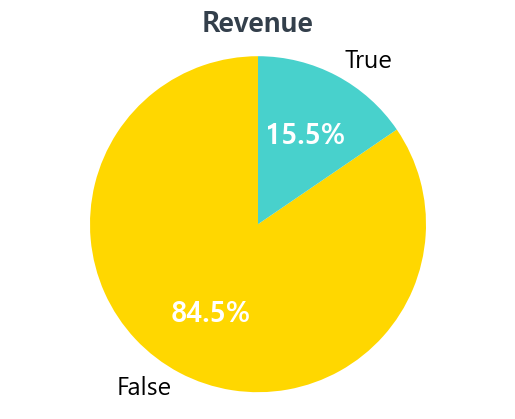

In [122]:
import matplotlib.pyplot as plt

# Revenue 데이터 값 추출
revenue = combined_df['Revenue'].value_counts()
labels = revenue.index
sizes = revenue.values

# 색상 설정
colors = ['gold', 'mediumturquoise']

# 파이 차트 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=['False', 'True'], colors=colors, autopct='%1.1f%%',
                                  startangle=90, textprops=dict(color="w"))

# 차트의 스타일 설정
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autotexts, size=20, weight="bold")
plt.setp(texts, size=18)

# 제목 설정
plt.title('Revenue', fontsize=20, fontweight='bold')

# 레이블 색상 변경
for text in texts:
    text.set_color('black')

plt.show()


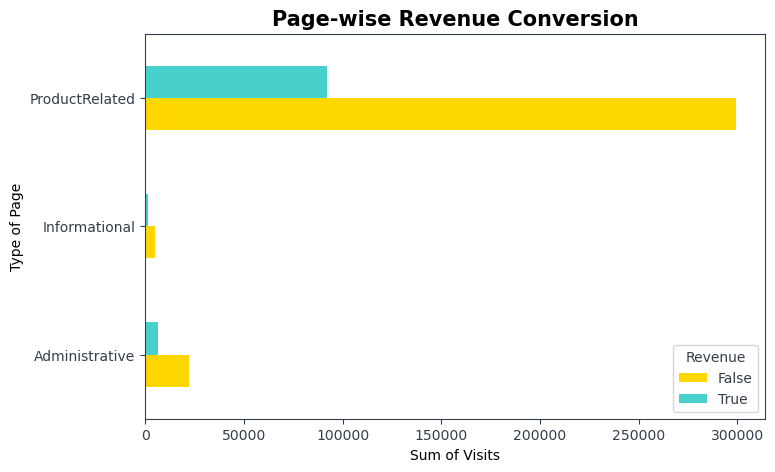

In [20]:
page = pd.pivot_table(combined_df,values=['Administrative','Informational','ProductRelated'],index='Revenue',aggfunc='sum')

# Plotting
plt.rcParams.update(plt.rcParamsDefault)

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

page.T.plot(kind='barh',figsize=(8,5),color=['gold', 'mediumturquoise'])
plt.title('Page-wise Revenue Conversion',fontweight='bold',size=15,color='black')
plt.ylabel('Type of Page')
plt.xlabel('Sum of Visits')
plt.show()

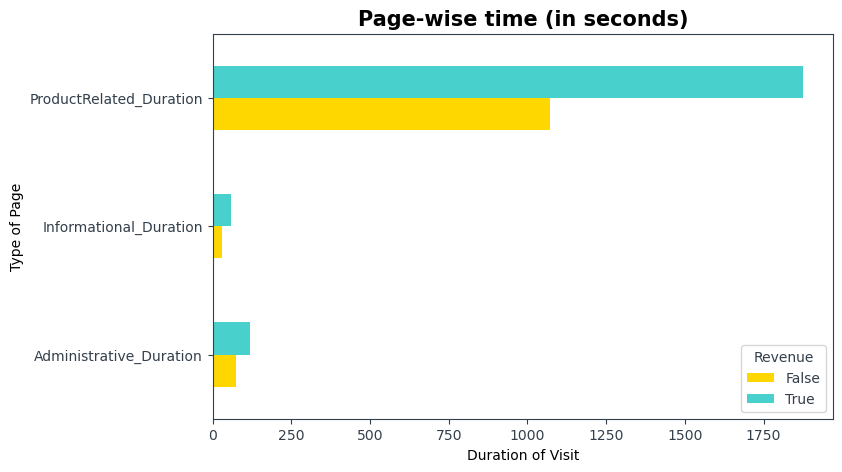

In [21]:
pd.pivot_table(combined_df,values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],index='Revenue').T.plot(kind='barh',figsize=(8,5),color=['gold', 'mediumturquoise'])
plt.title('Page-wise time (in seconds)',fontweight='bold',size=15,color='black')
plt.ylabel('Type of Page')
plt.xlabel('Duration of Visit')
plt.show()

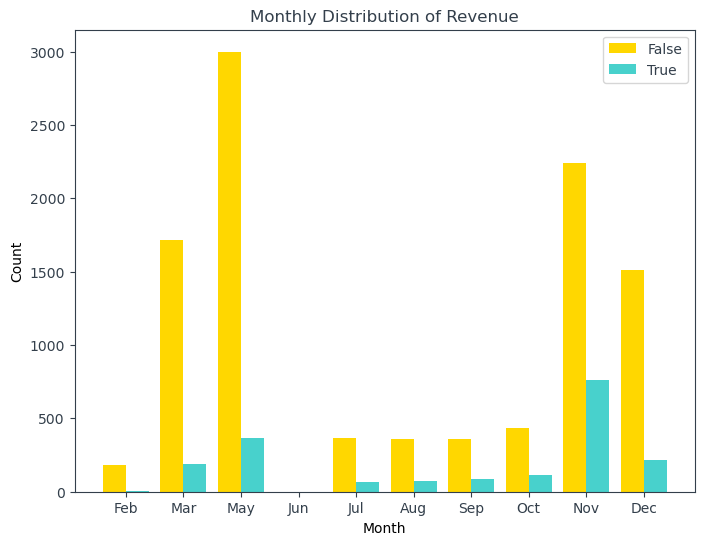

In [22]:
# 월별 매출 기여 데이터 계산
rev_counts = combined_df.groupby('Month')['Revenue'].value_counts().unstack(fill_value=0)

# 월 영어 명칭 설정
months = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']

# 월별 순서대로 정렬 및 인덱스 설정
rev_counts = rev_counts.reindex(months, fill_value=0)

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))

bar_width = 0.4
plt.bar(np.arange(len(rev_counts)), rev_counts[False], bar_width, label='False', color='gold')
plt.bar(np.arange(len(rev_counts)) + bar_width, rev_counts[True], bar_width, label='True', color='mediumturquoise')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution of Revenue')
plt.xticks(np.arange(len(rev_counts)) + bar_width / 2, rev_counts.index)
plt.legend()

plt.show()

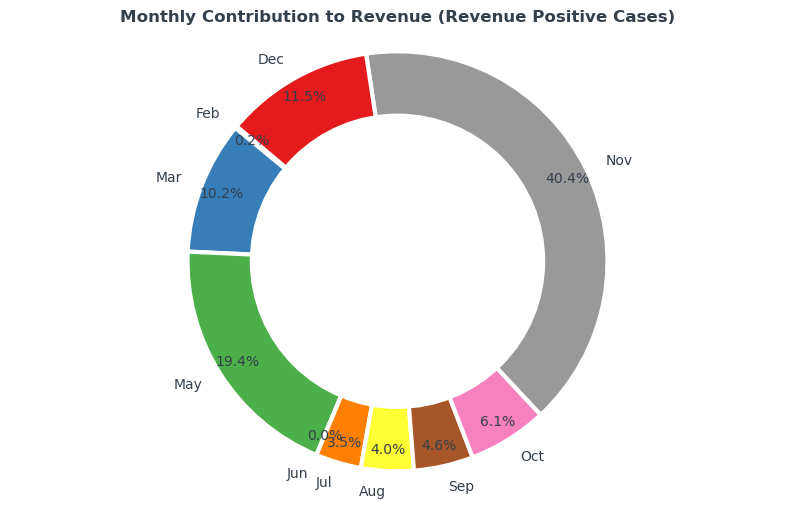

In [23]:
# 월별 매출 기여 데이터 계산
rev_True_months = combined_df[combined_df['Revenue'] == True]['Month'].value_counts().reindex(months, fill_value=0)

# 파이 차트 그리기 (도넛 형식)
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(rev_True_months, labels=rev_True_months.index, autopct='%1.1f%%', startangle=140, 
                                   colors=plt.cm.Set1.colors, pctdistance=0.9, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('Monthly Contribution to Revenue (Revenue Positive Cases)', fontweight='bold')

# 중앙에 구멍을 뚫기 위해 원의 크기를 조정
center_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# 각 섹션 사이에 경계선 추가
for wedge in wedges:
    wedge.set_edgecolor('white')

plt.axis('equal')  # 동그란 형태를 유지하기 위해
plt.show()

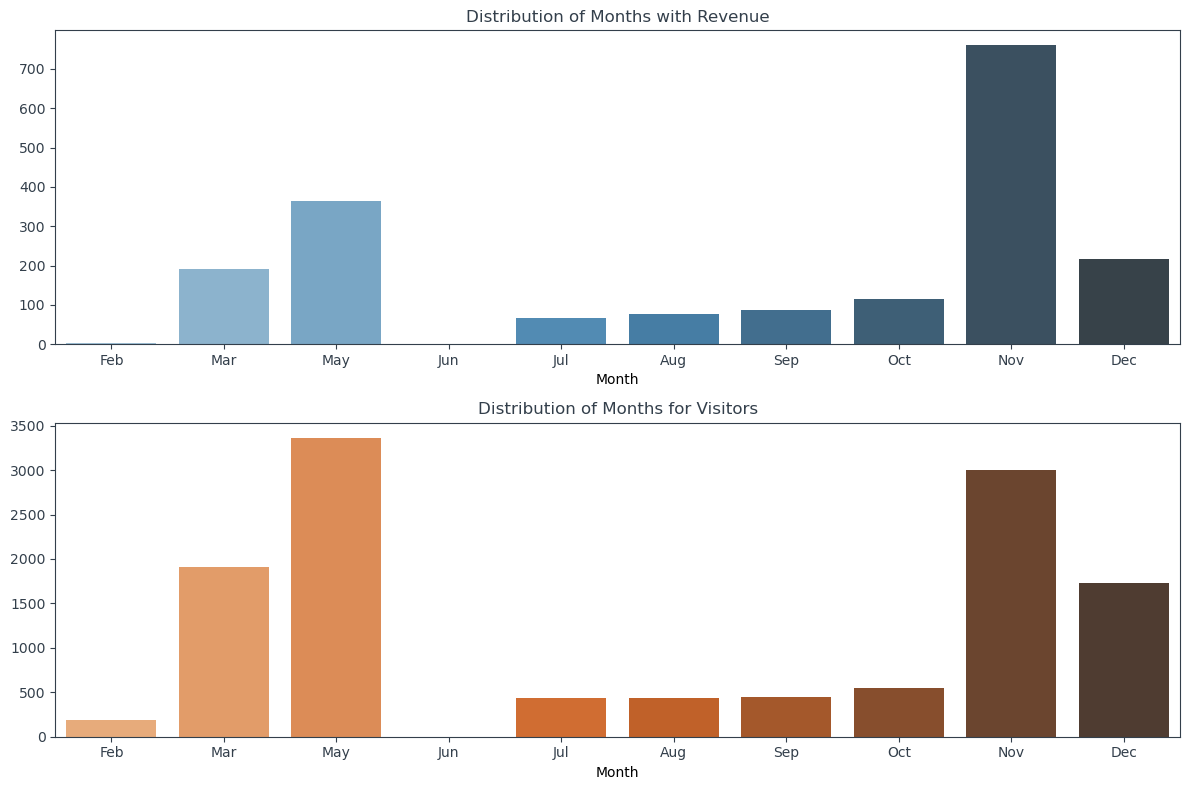

In [24]:
# 월별 매출 기여 데이터 계산
rev_True_months = combined_df[combined_df['Revenue'] == True]['Month'].value_counts().reindex(months, fill_value=0)

# 월별 방문자 데이터 계산
month_visits = X['Month'].value_counts().reindex(months, fill_value=0)

plt.figure(figsize=(12, 8))

# 첫 번째 subplot: 매출이 발생한 월의 분포
plt.subplot(2, 1, 1)
sns.barplot(x=rev_True_months.index, y=rev_True_months.values, palette='Blues_d')
plt.title('Distribution of Months with Revenue')

# 두 번째 subplot: 전체 방문자의 월별 방문 분포
plt.subplot(2, 1, 2)
sns.barplot(x=month_visits.index, y=month_visits.values, palette='Oranges_d')
plt.title('Distribution of Months for Visitors')

plt.tight_layout()
plt.show()


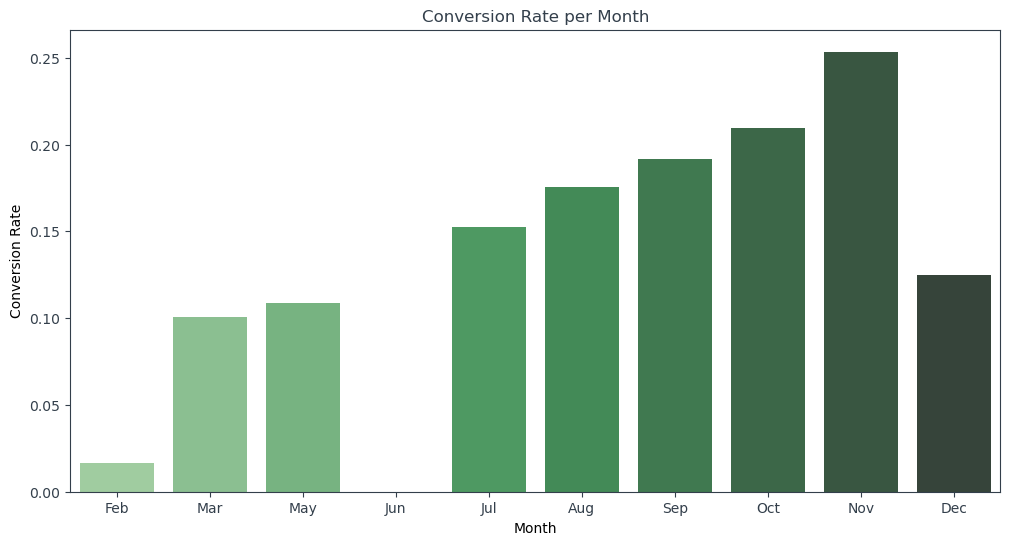

In [25]:
# 월별 매출 기여 데이터 계산
rev_True_months = combined_df[combined_df['Revenue'] == True]['Month'].value_counts().reindex(months, fill_value=0)

# 월별 방문자 데이터 계산
month_visits = X['Month'].value_counts().reindex(months, fill_value=0)

# 방문이 구매로 이어지는 비율 계산
conversion_rate = rev_True_months / month_visits

plt.figure(figsize=(12,6))
sns.barplot(x=conversion_rate.index, y=conversion_rate.values, palette='Greens_d')
plt.title('Conversion Rate per Month')
plt.ylabel('Conversion Rate')
plt.xlabel('Month')

plt.show()

In [26]:
# 방문자 유형별 세션 수 계산
visitor_counts = combined_df['VisitorType'].value_counts()

# 방문자 유형별 매출 발생 비율 계산
revenue_percentages = combined_df.groupby('VisitorType')['Revenue'].mean() * 100

# 전체 세션에서 재방문자가 차지하는 비율 계산
returning_visitor_percentage = visitor_counts['Returning_Visitor'] / combined_df.shape[0] * 100

# 재방문자 비율 계산
revenue_true_data = combined_df[combined_df['Revenue'] == True]
visitor_counts = revenue_true_data['VisitorType'].value_counts()
# 결과 출력
print(f"방문자 유형별 세션 수:\n{visitor_counts}\n")
print(f"방문자 유형별 매출 발생 비율(%):\n{revenue_percentages}\n")
print(f"전체 세션에서 재방문자가 차지하는 비율(%): {returning_visitor_percentage:.2f}%")

방문자 유형별 세션 수:
VisitorType
Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: count, dtype: int64

방문자 유형별 매출 발생 비율(%):
VisitorType
New_Visitor          24.911452
Other                18.823529
Returning_Visitor    13.932329
Name: Revenue, dtype: object

전체 세션에서 재방문자가 차지하는 비율(%): 85.57%


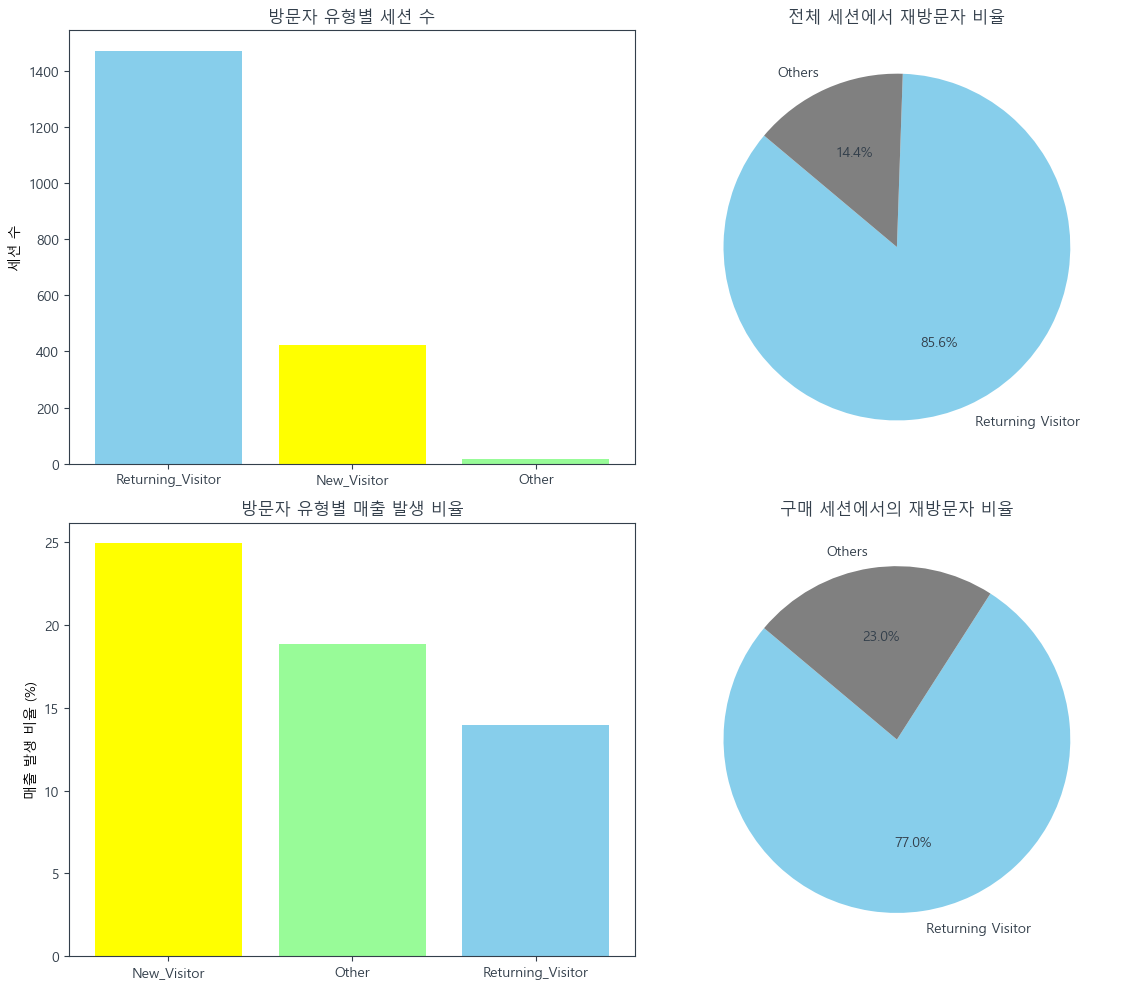

In [27]:
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 서브플롯으로 여러 그래프 한 번에 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# 방문자 유형별 세션 수 막대 그래프
axes[0, 0].bar(visitor_counts.index, visitor_counts.values, color=['skyblue', 'yellow','palegreen'])
axes[0, 0].set_ylabel('세션 수')
axes[0, 0].set_title('방문자 유형별 세션 수')

# 방문자 유형별 매출 발생 비율 막대 그래프
axes[1, 0].bar(revenue_percentages.index, revenue_percentages.values, color=['yellow', 'palegreen','skyblue'])
axes[1, 0].set_ylabel('매출 발생 비율 (%)')
axes[1, 0].set_title('방문자 유형별 매출 발생 비율')

# 전체 세션에서 재방문자 비율 원 그래프
labels = ['Returning Visitor', 'Others']
sizes = [returning_visitor_percentage, 100 - returning_visitor_percentage]
colors = ['skyblue', 'gray']
axes[0, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('전체 세션에서 재방문자 비율')

# 구매 세션에서의 재방문자 비율 파이 차트
purchase_sessions = combined_df[combined_df['Revenue'] == True]
returning_visitor_count = (purchase_sessions['VisitorType'] == 'Returning_Visitor').sum()
other_visitor_count = len(purchase_sessions) - returning_visitor_count

labels = ['Returning Visitor', 'Others']
sizes = [returning_visitor_count, other_visitor_count]
colors = ['skyblue', 'gray']

axes[1, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('구매 세션에서의 재방문자 비율')

# 서브플롯 간 간격 조정 및 전체 그래프 보여주기
plt.tight_layout()
plt.show()


# 4. Revenue 분석 - 로지스틱 회귀모델

## 4.1 Revenue 에 영향을 미치는 변수 분석

In [28]:
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from statsmodels.stats.contingency_tables import Table2x2
import itertools

# 범주형 변수와 연속형 변수 구분
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
continuous_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# 범주형 변수와 연속형 변수 간 관계 (ANOVA)
anova_results = {}
for cat in categorical_cols:
    for cont in continuous_cols:
        if combined_df[cat].nunique() > 1:
            groups = [combined_df[cont][combined_df[cat] == val] for val in combined_df[cat].unique()]
            f_val, p_val = f_oneway(*groups)
            anova_results[f'{cat} vs {cont}'] = p_val

# p-value가 낮은 순으로 정렬
anova_results = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}

In [29]:
anova_results

{'Month vs SpecialDay': 0.0,
 'Revenue vs PageValues': 0.0,
 'TrafficType vs ExitRates': 2.8369308073071122e-244,
 'TrafficType vs BounceRates': 2.9120490614449295e-175,
 'Revenue vs ExitRates': 1.662653625046055e-119,
 'Month vs ProductRelated': 2.0461829423809403e-118,
 'TrafficType vs SpecialDay': 4.1407675066971494e-100,
 'VisitorType vs ExitRates': 4.282460054622956e-95,
 'Month vs ProductRelated_Duration': 4.388618756794377e-84,
 'Revenue vs ProductRelated': 3.2411873288679093e-70,
 'Revenue vs ProductRelated_Duration': 6.11533825336717e-65,
 'Revenue vs BounceRates': 1.5941975384898047e-63,
 'Month vs Administrative': 1.8017355330194312e-63,
 'OperatingSystems vs BounceRates': 1.0066587180552647e-55,
 'VisitorType vs BounceRates': 1.0050903309806886e-54,
 'Revenue vs Administrative': 3.519759837717179e-54,
 'Month vs ExitRates': 3.728543398341977e-53,
 'TrafficType vs Administrative': 1.104411587725221e-49,
 'TrafficType vs PageValues': 7.450814904780466e-46,
 'OperatingSystems 

In [30]:
# Revenue와 관련된 ANOVA 결과 필터링
revenue_anova_results = {k: v for k, v in anova_results.items() if 'Revenue' in k}

# p-value가 낮은 순으로 정렬
revenue_anova_results = {k: v for k, v in sorted(revenue_anova_results.items(), key=lambda item: item[1])}

revenue_anova_results

{'Revenue vs PageValues': 0.0,
 'Revenue vs ExitRates': 1.662653625046055e-119,
 'Revenue vs ProductRelated': 3.2411873288679093e-70,
 'Revenue vs ProductRelated_Duration': 6.11533825336717e-65,
 'Revenue vs BounceRates': 1.5941975384898047e-63,
 'Revenue vs Administrative': 3.519759837717179e-54,
 'Revenue vs Informational': 3.1740343112109894e-26,
 'Revenue vs Administrative_Duration': 2.1465136347090738e-25,
 'Revenue vs SpecialDay': 5.498934260139406e-20,
 'Revenue vs Informational_Duration': 5.2828708606337516e-15}

In [31]:
# 범주형 변수 간의 관계 (카이제곱 검정 예시)
chi2_results = {}
for cat1, cat2 in itertools.combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(combined_df[cat1], combined_df[cat2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[f'{cat1} vs {cat2}'] = p

# p-value가 낮은 순으로 정렬
chi2_results = {k: v for k, v in sorted(chi2_results.items(), key=lambda item: item[1])}

In [32]:
chi2_results

{'Month vs TrafficType': 0.0,
 'OperatingSystems vs Browser': 0.0,
 'OperatingSystems vs TrafficType': 0.0,
 'OperatingSystems vs VisitorType': 0.0,
 'Browser vs TrafficType': 0.0,
 'Browser vs VisitorType': 0.0,
 'TrafficType vs VisitorType': 0.0,
 'Browser vs Region': 7.698462199597579e-284,
 'OperatingSystems vs Region': 7.29937210003443e-216,
 'Region vs VisitorType': 8.066996998771664e-164,
 'Month vs VisitorType': 1.6149400113281784e-91,
 'Region vs TrafficType': 3.515573427255576e-84,
 'Month vs Revenue': 2.2387855164805443e-77,
 'TrafficType vs Revenue': 1.652735258160153e-67,
 'Month vs Browser': 5.465866039834048e-61,
 'TrafficType vs Weekend': 1.786661929082849e-50,
 'Month vs OperatingSystems': 2.485499077759046e-40,
 'OperatingSystems vs Weekend': 3.7508576266269806e-35,
 'VisitorType vs Revenue': 4.269904152293867e-30,
 'Browser vs Weekend': 2.0550358006762103e-15,
 'Month vs Region': 8.133921799065058e-15,
 'OperatingSystems vs Revenue': 1.4160941129614401e-13,
 'Visitor

In [33]:
# Revenue와 관련된 Chi2 결과 필터링
revenue_chi2_results = {k: v for k, v in chi2_results.items() if 'Revenue' in k}

# p-value가 낮은 순으로 정렬
revenue_chi2_results = {k: v for k, v in sorted(revenue_chi2_results.items(), key=lambda item: item[1])}

revenue_chi2_results

{'Month vs Revenue': 2.2387855164805443e-77,
 'TrafficType vs Revenue': 1.652735258160153e-67,
 'VisitorType vs Revenue': 4.269904152293867e-30,
 'OperatingSystems vs Revenue': 1.4160941129614401e-13,
 'Weekend vs Revenue': 0.0012663251061221968,
 'Browser vs Revenue': 0.00608754317955109,
 'Region vs Revenue': 0.3214249979076556}

## 분석 결과
- Region 과 Revenue 사이에는 유의미한 관계 없음 

## 4.2 데이터 전처리, 분할 

In [56]:
from sklearn.preprocessing import StandardScaler
import warnings

# SettingWithCopyWarning 경고 메시지를 무시합니다.
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# 범주형 변수만 추출
cat = combined_df[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]

# 범주형 변수를 문자열로 변환 
cat['Month'] = cat['Month'].astype(str)
cat['OperatingSystems'] = cat['OperatingSystems'].astype(str)
cat['Browser'] = cat['Browser'].astype(str)
cat['TrafficType'] = cat['TrafficType'].astype(str)
cat['VisitorType'] = cat['VisitorType'].astype(str)
cat['Weekend'] = cat['Weekend'].astype(bool)

# 'Region' 변수 제거
cat.drop('Region', axis=1, inplace=True)

# 연속형 변수만 추출
num = combined_df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
                   'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

# Scaling 
sc = StandardScaler()
sc_num = pd.DataFrame(sc.fit_transform(num), columns=num.columns)

# 범주형 변수 결합
new_df = pd.concat([sc_num, cat], axis=1)

# 'Weekend'와 'Revenue' 변수 인코딩
new_df['Weekend'].replace({False: 0, True: 1}, inplace=True)

# 'Revenue' 변수를 combined_df에서 new_df로 추가 후 인코딩
new_df['Revenue'] = combined_df['Revenue'].replace({False: 0, True: 1})

In [57]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  TrafficType              12330 non-null  object 
 14  VisitorType           

In [58]:
new_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,1,1,1,Returning_Visitor,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,2,2,2,Returning_Visitor,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,4,1,3,Returning_Visitor,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,3,2,4,Returning_Visitor,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,3,3,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,Dec,4,6,1,Returning_Visitor,1,0
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,Nov,3,2,8,Returning_Visitor,1,0
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,Nov,3,2,13,Returning_Visitor,1,0
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,Nov,2,2,11,Returning_Visitor,0,0


In [59]:
cat.dtypes

Month               object
OperatingSystems    object
Browser             object
TrafficType         object
VisitorType         object
Weekend               bool
dtype: object

In [60]:
# One hot encoding / dummy variables

sc_df = pd.get_dummies(new_df,drop_first=True)
sc_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,True
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,True
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,True,False,False,False,False,False,False,False,True
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,False,False,True,False,False,False,False,False,False,True
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,False,False,True,False,False,False,False,False,False,True


In [61]:
y = sc_df['Revenue']
x = sc_df.drop('Revenue',axis = 1)
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state = 2)

print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)
print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (8631, 60)
ytrain (8631,)
xtest (3699, 60)
ytest (3699,)


## 4.3 로지스틱 회귀모델 

In [62]:
#fitting a base model for comparison with...

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(xtrain,ytrain)


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

ypred_train = log_reg.predict(xtrain)
ypred_test = log_reg.predict(xtest)

#Accuracy(정확도)
print('Train Accuracy:',accuracy_score(ytrain,ypred_train))
print('Test Accuracy:',accuracy_score(ytest,ypred_test))
print()

#Precision(정밀도)
print('Train Precision:',precision_score(ytrain,ypred_train))
print('Test Precision:',precision_score(ytest,ypred_test))
print()

#Recall(재현율)
print('Train Recall:',recall_score(ytrain,ypred_train))
print('Test Recall:',recall_score(ytest,ypred_test))
print()

#F1 Score 
print('Train f1 score:',f1_score(ytrain,ypred_train))
print('Test f1 score:',f1_score(ytest,ypred_test))

Train Accuracy: 0.8841385702699571
Test Accuracy: 0.8902406055690727

Train Precision: 0.7621023513139695
Test Precision: 0.7157894736842105

Train Recall: 0.3995649021029732
Test Recall: 0.3856332703213611

Train f1 score: 0.5242626070409134
Test f1 score: 0.5012285012285013


In [63]:
ytrain_prob = log_reg.predict_proba(xtrain)[:,1]
ytest_prob = log_reg.predict_proba(xtest)[:,1]

print('Train ROC AUC Score',roc_auc_score(ytrain,ytrain_prob))
print('Test ROC AUC Score',roc_auc_score(ytest,ytest_prob))

Train ROC AUC Score 0.8993909109417242
Test ROC AUC Score 0.8913037514982737


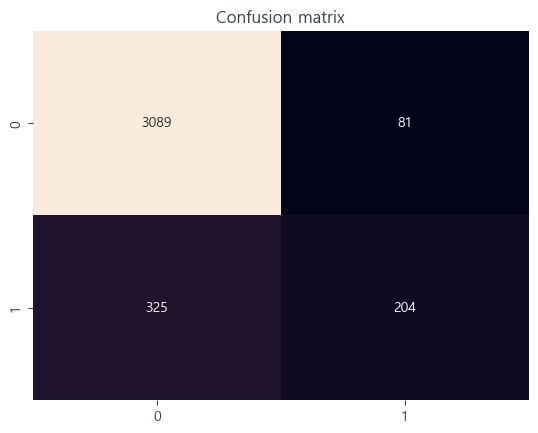

In [64]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest,ypred_test)),annot=True,fmt='d',cbar=False)
plt.title('Confusion matrix')
plt.show()

## 4.4 HyperParameter Tuning 

In [65]:
from sklearn.model_selection import 

# 로지스틱 회귀모델 생성
model = LogisticRegression(solver='liblinear')

# 탐색할 매개변수 그리드 설정
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # C 매개변수의 값 범위
    'penalty': ['l1', 'l2']  # 규제 유형
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# GridSearchCV를 통한 모델 학습
grid_search.fit(xtrain, ytrain)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측
ypred_test = best_model.predict(xtest)

# 정확도 평가
accuracy = accuracy_score(ytest, ypred_test)
print("테스트 정확도:", accuracy)

최적의 하이퍼파라미터: {'C': 1, 'penalty': 'l1'}
테스트 정확도: 0.8905109489051095


In [69]:
from sklearn.linear_model import LogisticRegression
log_reg2 = LogisticRegression(solver='liblinear', penalty = 'l1')
log_reg2.fit(xtrain,ytrain)


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

ypred_train2 = log_reg2.predict(xtrain)
ypred_test2 = log_reg2.predict(xtest)

#Accuracy(정확도)
print('Train Accuracy:',accuracy_score(ytrain,ypred_train2))
print('Test Accuracy:',accuracy_score(ytest,ypred_test2))
print()

#Precision(정밀도)
print('Train Precision:',precision_score(ytrain,ypred_train2))
print('Test Precision:',precision_score(ytest,ypred_test2))
print()

#Recall(재현율)
print('Train Recall:',recall_score(ytrain,ypred_train2))
print('Test Recall:',recall_score(ytest,ypred_test2))
print()

#F1 Score 
print('Train f1 score:',f1_score(ytrain,ypred_train2))
print('Test f1 score:',f1_score(ytest,ypred_test2))
print()

ytrain_prob2 = log_reg2.predict_proba(xtrain)[:,1]
ytest_prob2 = log_reg2.predict_proba(xtest)[:,1]

print('Train ROC AUC Score',roc_auc_score(ytrain,ytrain_prob2))
print('Test ROC AUC Score',roc_auc_score(ytest,ytest_prob2))

Train Accuracy: 0.883559263121307
Test Accuracy: 0.8905109489051095

Train Precision: 0.7611731843575419
Test Precision: 0.7183098591549296

Train Recall: 0.39521392313270487
Test Recall: 0.3856332703213611

Train f1 score: 0.5202863961813843
Test f1 score: 0.5018450184501845

Train ROC AUC Score 0.8992747168443844
Test ROC AUC Score 0.8923449398603401


In [70]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Base Model 성능 계산
base_model_metrics = [
    accuracy_score(ytrain, ypred_train),
    accuracy_score(ytest, ypred_test),
    precision_score(ytrain, ypred_train),
    precision_score(ytest, ypred_test),
    recall_score(ytrain, ypred_train),
    recall_score(ytest, ypred_test),
    f1_score(ytrain, ypred_train),
    f1_score(ytest, ypred_test),
    roc_auc_score(ytrain, ytrain_prob),
    roc_auc_score(ytest, ytest_prob)
]

# GridSearchCV를 적용한 모델 성능 계산
GridSearchCV_metrics = [
    accuracy_score(ytrain, ypred_train2),
    accuracy_score(ytest, ypred_test2),
    precision_score(ytrain, ypred_train2),
    precision_score(ytest, ypred_test2),
    recall_score(ytrain, ypred_train2),
    recall_score(ytest, ypred_test2),
    f1_score(ytrain, ypred_train2),
    f1_score(ytest, ypred_test2),
    roc_auc_score(ytrain, ytrain_prob2),
    roc_auc_score(ytest, ytest_prob2)
]

# 데이터프레임 생성
index = ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 
         'Train Recall', 'Test Recall', 'Train f1 score', 'Test f1 score', 
         'Train ROC AUC Score', 'Test ROC AUC Score']

Final = pd.DataFrame(index=index)
Final['Base Model'] = base_model_metrics
Final['GridSearchCV'] = GridSearchCV_metrics

print(Final)


                     Base Model  GridSearchCV
Train Accuracy         0.884139      0.883559
Test Accuracy          0.890511      0.890511
Train Precision        0.762102      0.761173
Test Precision         0.718310      0.718310
Train Recall           0.399565      0.395214
Test Recall            0.385633      0.385633
Train f1 score         0.524263      0.520286
Test f1 score          0.501845      0.501845
Train ROC AUC Score    0.899391      0.899275
Test ROC AUC Score     0.891304      0.892345


## 4.5  데이터 불규형 처리 - Smote 를 활용한 Oversampling 

In [71]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
import pandas as pd

# SMOTE 객체 생성
smote = SMOTE(random_state=0)

# SMOTE를 적용하여 오버샘플링된 데이터셋 생성
xtrain_over, ytrain_over = smote.fit_resample(xtrain, ytrain)

# 예측 결과 계산 (학습 데이터셋과 테스트 데이터셋 모두)
ypred_train_over = log_reg.predict(xtrain_over)
ypred_test_over = log_reg.predict(xtest)

# 데이터셋 차원과 레이블 분포 출력
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', xtrain.shape, ytrain.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', xtrain_over.shape, ytrain_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(ytrain_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (8631, 60) (8631,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (14504, 60) (14504,)
SMOTE 적용 후 레이블 값 분포: 
 Revenue
0    7252
1    7252
Name: count, dtype: int64


In [72]:
#Logistic Regression 모델 생성 및 학습
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(xtrain_over,ytrain_over)

# 예측 결과 계산 (학습 데이터셋과 테스트 데이터셋 모두)
ypred_train_over = log_reg.predict(xtrain_over)
ypred_test_over = log_reg.predict(xtest)

# 성능 평가
print('Train 데이터 Accuracy:', accuracy_score(ytrain_over, ypred_train_over))
print('Test 데이터 Accuracy:', accuracy_score(ytest, ypred_test_over))

print('Train 데이터 Precision:', precision_score(ytrain_over, ypred_train_over))
print('Test 데이터 Precision:', precision_score(ytest, ypred_test_over))

print('Train 데이터 Recall:', recall_score(ytrain_over, ypred_train_over))
print('Test 데이터 Recall:', recall_score(ytest, ypred_test_over))

print('Train 데이터 F1-score:', f1_score(ytrain_over, ypred_train_over))
print('Test 데이터 F1-score:', f1_score(ytest, ypred_test_over))

print('Train 데이터 Confusion Matrix:\n', confusion_matrix(ytrain_over, ypred_train_over))
print('Test 데이터 Confusion Matrix:\n', confusion_matrix(ytest, ypred_test_over))

print('Train 데이터 AUC Score:', roc_auc_score(ytrain_over, ypred_train_over))
print('Test 데이터 AUC Score:', roc_auc_score(ytest, ypred_test_over))

Train 데이터 Accuracy: 0.8614175399889685
Test 데이터 Accuracy: 0.8610435252771019
Train 데이터 Precision: 0.8841981823512166
Test 데이터 Precision: 0.510548523206751
Train 데이터 Recall: 0.8317705460562603
Test 데이터 Recall: 0.6862003780718336
Train 데이터 F1-score: 0.8571834588603098
Test 데이터 F1-score: 0.5854838709677419
Train 데이터 Confusion Matrix:
 [[6462  790]
 [1220 6032]]
Test 데이터 Confusion Matrix:
 [[2822  348]
 [ 166  363]]
Train 데이터 AUC Score: 0.8614175399889685
Test 데이터 AUC Score: 0.7882105991305541


## 4.6 XGBoost 

In [113]:
from xgboost import XGBClassifier

# XGBoost 모델 정의 및 학습
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(xtrain, ytrain)

# 테스트 데이터로 예측 수행
y_pred_xgb = xgb.predict(xtest)

# 정확도, 정밀도, 재현율, F1 점수 계산
accuracy = accuracy_score(ytest, y_pred_xgb)
precision = precision_score(ytest, y_pred_xgb)
recall = recall_score(ytest, y_pred_xgb)
f1 = f1_score(ytest, y_pred_xgb)

print("모델 평가 지표:")
print(f"정확도: {accuracy:.4f}")
print(f"정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1 점수: {f1:.4f}")

모델 평가 지표:
정확도: 0.9073
정밀도: 0.7048
재현율: 0.6049
F1 점수: 0.6511


In [114]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# XGBoost 모델 정의
xgb = XGBClassifier(random_state=42)

# 튜닝할 매개변수 그리드 정의
param_grid = {
    'max_depth': [3, 6, 9],           # 트리의 최대 깊이
    'learning_rate': [0.1, 0.01],     # 학습률
    'n_estimators': [100, 200, 300]   # 트리의 개수
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# GridSearchCV를 사용하여 모델 훈련
grid_search.fit(xtrain, ytrain)

# 최적의 매개변수 출력
print("최적의 매개변수:", grid_search.best_params_)

# 최적의 모델
best_model2 = grid_search.best_estimator_

# 테스트 데이터로 예측 수행
y_pred2 = best_model2.predict(xtest)

# 성능 평가
accuracy = accuracy_score(ytest, y_pred2)
precision = precision_score(ytest, y_pred2)
recall = recall_score(ytest, y_pred2)
f1 = f1_score(ytest, y_pred2)
roc_auc = roc_auc_score(ytest, y_pred2)

print("최적 모델 성능:")
print(f"정확도: {accuracy:.4f}")
print(f"정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1 점수: {f1:.4f}")
print(f"ROC AUC 점수: {roc_auc:.4f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
최적의 매개변수: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
최적 모델 성능:
정확도: 0.9081
정밀도: 0.7143
재현율: 0.5955
F1 점수: 0.6495
ROC AUC 점수: 0.7779


## 4.7 모델 평가

In [115]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# SMOTE를 적용한 모델 성능 계산
smote_model_metrics = [
    accuracy_score(ytrain_over, ypred_train_over),
    accuracy_score(ytest, ypred_test_over),
    precision_score(ytrain_over, ypred_train_over),
    precision_score(ytest, ypred_test_over),
    recall_score(ytrain_over, ypred_train_over),
    recall_score(ytest, ypred_test_over),
    f1_score(ytrain_over, ypred_train_over),
    f1_score(ytest, ypred_test_over),
    roc_auc_score(ytrain_over, ypred_train_over),
    roc_auc_score(ytest, ypred_test_over)
]

# XGBoost를 적용한 모델 성능 계산
xgb_metrics = [ None,
    accuracy_score(ytest, y_pred_xgb),
               None,
    precision_score(ytest, y_pred_xgb),
               None,
    recall_score(ytest, y_pred_xgb),
               None,
    f1_score(ytest,y_pred_xgb),
               None,
    roc_auc_score(ytest, y_pred_xgb)
]


# 데이터프레임 생성
index = ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 
         'Train Recall', 'Test Recall', 'Train f1 score', 'Test f1 score', 
         'Train ROC AUC Score', 'Test ROC AUC Score']

#Final = pd.DataFrame(index=index)
#Final['Base Model'] = base_model_metrics
Final['SMOTE Model'] = smote_model_metrics
Final['XGB Model'] = xgb_metrics

print(Final)


                     Base Model  GridSearchCV  SMOTE Model  XGB Model
Train Accuracy         0.884139      0.883559     0.861418        NaN
Test Accuracy          0.890511      0.890511     0.861044   0.907272
Train Precision        0.762102      0.761173     0.884198        NaN
Test Precision         0.718310      0.718310     0.510549   0.704846
Train Recall           0.399565      0.395214     0.831771        NaN
Test Recall            0.385633      0.385633     0.686200   0.604915
Train f1 score         0.524263      0.520286     0.857183        NaN
Test f1 score          0.501845      0.501845     0.585484   0.651068
Train ROC AUC Score    0.899391      0.899275     0.861418        NaN
Test ROC AUC Score     0.891304      0.892345     0.788211   0.781322


# 5. Feature 별 중요도 

In [118]:
from xgboost import XGBClassifier
# XGBoost 모델 정의 및 학습
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=42)
xgb.fit(xtrain, ytrain)

rank = pd.DataFrame()
rank['Features'] = xtrain.columns
rank['Rank'] = xgb.feature_importances_
rank.sort_values(by='Rank',ascending=False).head(10)

,Features,Rank
8,PageValues,0.389630
16,Month_May,0.067288
17,Month_Nov,0.063198
0,Administrative,0.046533
6,BounceRates,0.037560
59,VisitorType_Returning_Visitor,0.035257
15,Month_Mar,0.033963
5,ProductRelated_Duration,0.024068
49,TrafficType_2,0.023568
7,ExitRates,0.023553


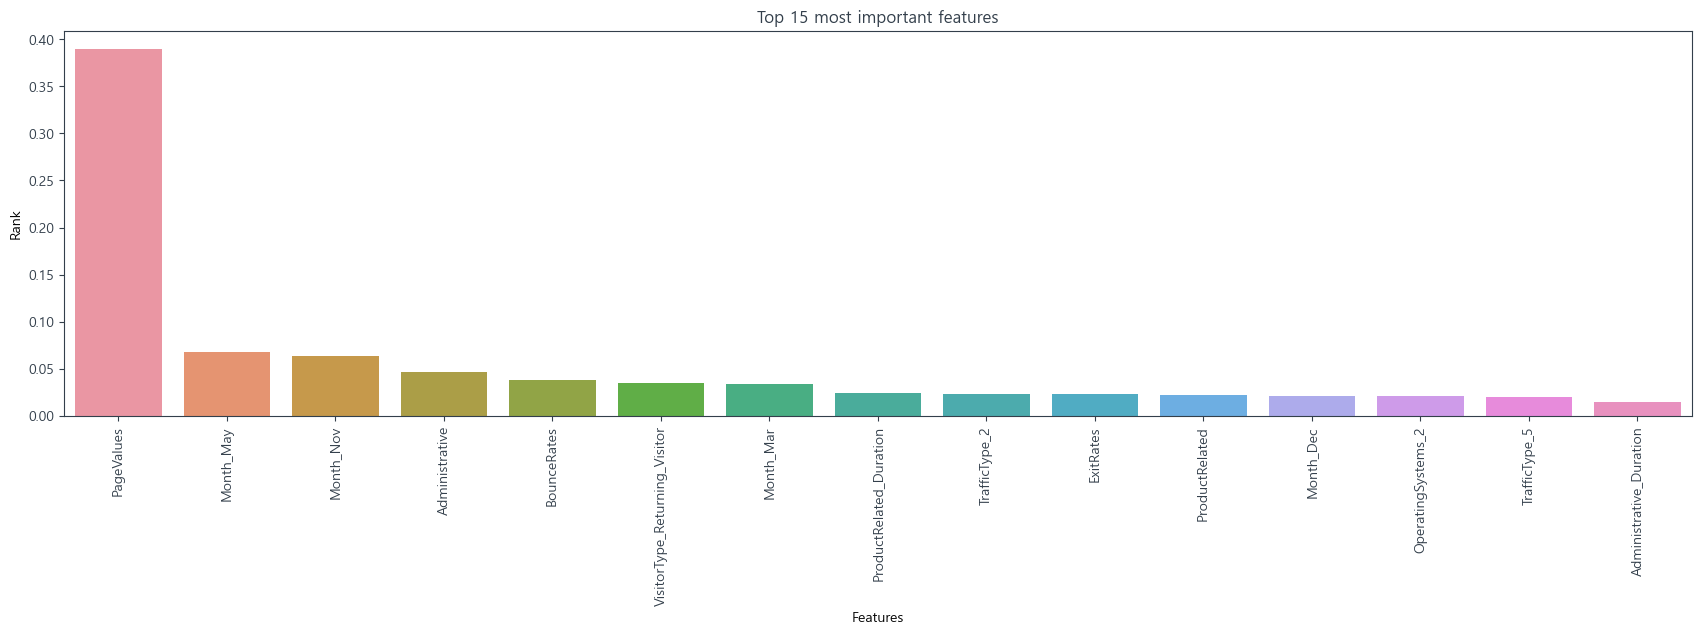

In [120]:
plt.figure(figsize=(21,5))
sns.barplot(x='Features',y='Rank',data=rank.sort_values(by='Rank',ascending=False).head(15))
plt.title('Top 15 most important features')
plt.xticks(rotation=90)
plt.show()